<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">Hawkes process simulation</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


We consider a Hawkes process $N$ with intensity
$$
\lambda_t = g_0(t) + \int_0^t K(t-s) dN_s.
$$
Its integrated intensity $U_t := \int_0^t \lambda_s ds$ can be written as
$$
U_t = \int_0^t g_0(s) ds + \int_0^t K(t-s) (U_sds + Z_s ds),
$$
where $Z := N - U$ is a martingale with $\langle Z \rangle = U$ and $K$ is a locally integrable kernel ($L^1([0,T])$, not necessarily $L^2$). We will take:
$$ g_0(t) \equiv \mu, $$
with $\mu \geq 0$.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The scheme </h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


Define
$$ U_{t,s} := U_s - U_t, \quad Z_{t,s}  = Z_s - Z_t, \quad t\leq s, $$
and
$$ g_t(s) := g_0(s) + \int_0^t K(s-u) (dU_{0,u} + dZ_{0,u}), \quad t < s .$$
When we write $dZ_{t,u}$ we mean differential in the second variable $u$.  (In case of square integrable kernel, $g_t(s) = \mathbb E[ \lambda_s | \mathcal F_t]$.)

The dynamics of $U$ can be written in the form
$$ U_{t,s} = \int_t^s g_t(u) du +  \int_t^s K(s-u) (U_{t,u}du + Z_{t,u} du)  $$

We are simply going to discretize the second integral appearing  using a right-point  approximation
$$
\int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du) \approx \int_t^s K(s-u) du (U_{t,s} + Z_{t,s}) = \int_0^{t-s} K(u) du  (U_{t,s} + Z_{t,s})
$$


This leads to the scheme
$$
U_{i,i+1}  = \alpha_i + \bar K_{\Delta t}  U_{i,i+1} + \bar K_{\Delta t} Z_{i,i+1}
$$
with
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(u) du, \quad   \bar K_{\Delta t} = \int_0^{\Delta t} K(u) du  $$

This means that, at time $t$ since we have access to $\alpha_i$, all we need to know to obtain $U_{i,i+1}$ is to simulate a random variable $U$ following the **Inverse Gaussian** distribution
$$ U \sim IG ( \alpha, (\alpha/\sigma)^2 )  $$
See https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

__TODO__: add motivation via the CF

The link $Z_{i, i+1} = \tilde W_{U_{i, i+1}}$ is absent for discontinuous processes, however, one can use the fact that $U_{i, i+1}$ is the integrated intensity of the process $N$ over $[t_i, t_{i+1}]$, so that the conditional law
$$
\mathcal{L}(N_{i, i+1} | U_{i, i+1}) \sim \mathcal{P}(U_{i, i+1}),
$$
and $N_{i, i+1}$ can be simulated _exactly_ once $U_{i, i+1}$ is known.

# Developping expression of $\alpha_i$
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \int_{t_i}^{t_{i+1}} g_{0}(s) ds  + \int_{t_i}^{t_{i+1}} \int_0^{t_{i}} K(s-u) (dU_{0,u} + dZ_{0,u})  du ds $$
Now we observe that $d{Z_{0,u}} = dZ_{t_j,u}$ whenever, $t_j\leq u$ (similar for $U$) so that we can write:
$$   \int_0^{t_{i}} K(s-u) (dU_{0,u} + dZ_{0,u}) = \sum_{j=0}^{i-1} \int_{t_{j}}^{t_{j+1}} K(s-u)  (dU_{{t_j},u} + dZ_{{t_j},u}),   $$
so that an application of Fubini yields
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \sum_{j=0}^{i-1}  \int_{t_{j}}^{t_{j+1}}  \left(  \int_{t_i}^{t_{i+1}}  K(s-u)ds \right) (dU_{t_{j},u} +  dZ_{t_j,u})  du \approx \sum_{j=0}^{i-1} \bar K_{ij}  \int_{t_{j}}^{t_{j+1}}  (dU_{t_{j},u} + dZ_{t_j,u})  du = \sum_{j=0}^{i-1}  \bar K_{ij} (U_{t_{j},t_{j+1}} + Z_{t_{j},t_{j+1}})   ,  $$
with

$$ \bar K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

# Scheme



Fix $t_0 = 0 < t_1 < \ldots < t_n = T$ a partition and  construct $(Z_{j,j+1})_{i=0,\ldots, n}$ and $(U_{i,i+1})_{i=0,\ldots, n-1}$  recursively. For each $i=0,\ldots, N-1$
First we compute $\alpha_i$
$$ \alpha_{i}  = \int_{t_i}^{t_{i+1}} g_0(s) ds + \sum_{j=0}^{i-1}   \bar K_{ij} (U_{j,j+1}  +  Z_{j,j+1})  $$
with an initialization (for $i=0$) to $\alpha_0=\int_0^{t_1} g_0(s) ds$ and
$$ \bar K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

we  first simulate  (here we need $1- \bar K_{\Delta t}\geq 0$)
$$ U_{i,i+1} \sim IG \left(\frac{\alpha_i}{ 1 - \bar K_{\Delta t}}, \left(\frac{\alpha_i}{\bar K_{\Delta t}}\right)^2 \right) $$
and then, we simulate 
$$
N_{i, i+1} \sim \mathcal{P}(U_{i,i+1}),
$$ 
and set $Z_{i, i+1} = N_{i, i+1} - U_{i,i+1}$.

# Fractional kernel
$$K(t)=\frac{t^{H-1/2}}{\Gamma(H+0.5)} , \quad H \in (-1/2, 1/2], \quad g_0(t) = \mu.$$

We denote 

$$
\bar K(t) := \int_0^t K(s) ds = \dfrac{t^{H + 0.5}}{\Gamma(H+1.5)}, \quad \bar g_0(t) := \int_0^t g_0(s) ds = \mu t.
$$

The following quantities need to be computed with:

$$ \int_{t_i}^{t_{i+1}} g_0(s) ds = \bar g_0(t_{i+1}) - \bar g_0(t_{i})$$
$$  \bar K_{\Delta t} = \bar K(\Delta t), \quad i =0, \ldots, n.$$
$$ \bar K_{ij} = \int_{t_i - t_j}^{t_{i+1} - t_j} K(u) du  = \bar K(t_{i+1} - t_j) - \bar K(t_i - t_j), \quad j = 0, \ldots i-1, \quad  i =1, \ldots, n.$$

In [1]:
%load_ext autoreload
%autoreload 2
import sys
if "../" not in sys.path:
    sys.path.append("../")

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from scipy.special import gamma

from volterra_hawkes.iVi.iVi_hawkes import IVIHawkesProcess
from volterra_hawkes.kernel.exponential_kernel import ExponentialKernel
from volterra_hawkes.kernel.constant_kernel import ConstantKernel
from volterra_hawkes.kernel.fractional_kernel import FractionalKernel

color_cycle = ["#5b6c64", "#B56246", "#322B4D", "#28BC9C", "#71074E"]
plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 5, 5)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True
plt.rcParams['axes.prop_cycle']       = matplotlib.cycler(color=color_cycle) 

### Hawkes process simulation

In [2]:
mu = 0.7

def g0_const(t, mu=mu):
    return mu * np.ones_like(t)

def g0_bar_const(t, mu=mu):
    return mu * t

C:\Users\DM6579\OneDrive - ENGIE\projects\volterra_hawkes\notebooks\..\volterra_hawkes\kernel\fractional_kernel.py:18: RuntimeWarning: invalid value encountered in power
  return self.c * t**(alpha - 1) / gamma(alpha)
C:\Users\DM6579\OneDrive - ENGIE\projects\volterra_hawkes\notebooks\..\volterra_hawkes\kernel\fractional_kernel.py:18: RuntimeWarning: divide by zero encountered in power
  return self.c * t**(alpha - 1) / gamma(alpha)


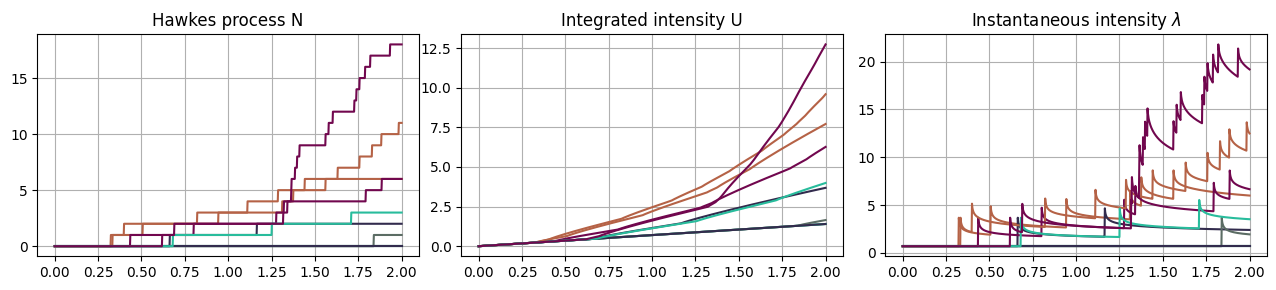

In [3]:
H = 0.3

T = 2
n_steps = 1000
n_paths = 10

t_grid = np.linspace(0, T, n_steps + 1)

rng = np.random.default_rng(seed=42)

K = FractionalKernel(H=H, c=1)
ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const)
N, U, lam = ivi_hawkes.simulate(t_grid=t_grid, n_paths=n_paths)

fig, ax = plt.subplots(1, 3, figsize=(13, 3))
n_show = n_paths

ax[0].plot(t_grid, N[:, 0:n_show])
ax[0].set_title('Hawkes process N')
ax[0].grid("on")

#ax[1].plot(t_grid, U[:,0:n_show])
ax[1].plot(t_grid, U[:,0:n_show])
ax[1].set_title('Integrated intensity U')
ax[1].grid("on")

#ax[2].plot(t_grid[1:], dU[:, 0:n_show] / np.diff(t_grid).reshape((-1, 1)))
ax[2].plot(t_grid, lam[:,0:n_show])
ax[2].set_title('Instantaneous intensity $\lambda$')
ax[2].grid("on")

plt.show()

# Sanity check

To check the proposed simulation algorighm, we compute the empirical means over the simulated trajectories of $N$ and $U$.

Note that
$$
\mathbb{E}[N_t] = \mathbb{E}[U_t] =: m_t,  
$$
where $m$ satisfies the Fredholm's equation
$$
m_t = \bar g_0(t) + \int_0^tK(t - s)m_sds,
$$
and hence,
$$
m_t = \bar g_0(t) + \int_0^tR(t - s) g_0(s)ds,
$$
where $R$ is the resolvent of $K$ satisfying
$$
R * K = K * R = R - K.
$$

For instance, the resolvent corresponding to the fractional kernel is given by
$$
R(t) = t^{\alpha - 1} E_{\alpha, \alpha}(t^\alpha), \quad \alpha = H + 0.5,
$$
where $E_{\alpha, \beta}$ denotes the Mittag–Leffler function
$$
E_{\alpha, \beta}(z) = \sum_{n \geq 0}\dfrac{z^n}{\Gamma(\alpha n + \beta)}.
$$

C:\Users\DM6579\OneDrive - ENGIE\projects\volterra_hawkes\notebooks\..\volterra_hawkes\kernel\fractional_kernel.py:31: RuntimeWarning: divide by zero encountered in power
  return self.c * t**(alpha - 1) * mittag_leffler(t=self.c * t**alpha, alpha=alpha, beta=alpha)
C:\Users\DM6579\OneDrive - ENGIE\projects\volterra_hawkes\notebooks\..\volterra_hawkes\kernel\fractional_kernel.py:31: RuntimeWarning: invalid value encountered in power
  return self.c * t**(alpha - 1) * mittag_leffler(t=self.c * t**alpha, alpha=alpha, beta=alpha)


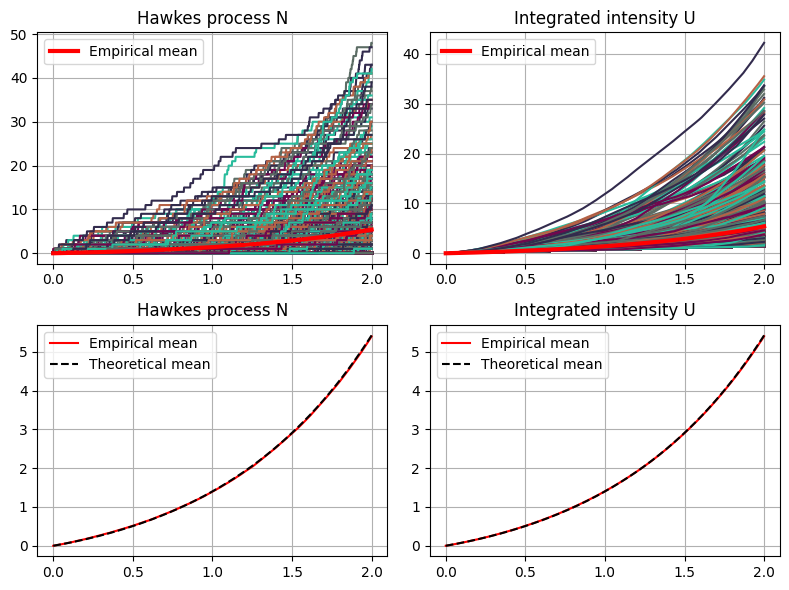

In [4]:
rng = np.random.default_rng(seed=42)
ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const)

R_mat = np.tril(ivi_hawkes.kernel.resolvent(t_grid[:, None] - t_grid[None, :]), k=-1)
expected_U = ivi_hawkes.g0_bar(t_grid) + R_mat @  ivi_hawkes.g0_bar(t_grid) * (t_grid[1] - t_grid[0])

n_show = 1000
n_paths = 10000

N, U, lam = ivi_hawkes.simulate(t_grid=t_grid, n_paths=n_paths)

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0, 0].plot(t_grid, N[:, 0:n_show])
ax[0, 0].plot(t_grid, N.mean(axis=1), "r", lw=3, label="Empirical mean")
ax[0, 0].set_title('Hawkes process N')
ax[0, 0].legend()
ax[0, 0].grid("on")

ax[0, 1].plot(t_grid, U[:,0:n_show])
ax[0, 1].plot(t_grid, U.mean(axis=1), "r", lw=3, label="Empirical mean")
ax[0, 1].set_title('Integrated intensity U')
ax[0, 1].legend()
ax[0, 1].grid("on")

ax[1, 0].plot(t_grid, N.mean(axis=1), "r", label="Empirical mean")
ax[1, 0].plot(t_grid, expected_U, "k--", label="Theoretical mean")
ax[1, 0].set_title('Hawkes process N')
ax[1, 0].legend()
ax[1, 0].grid("on")

ax[1, 1].plot(t_grid, U.mean(axis=1), "r", label="Empirical mean")
ax[1, 1].plot(t_grid, expected_U, "k--", label="Theoretical mean")
ax[1, 1].set_title('Integrated intensity U')
ax[1, 1].legend()
ax[1, 1].grid("on")

plt.show()